In [14]:
from skimage.feature import hog
#from skimage.io import imread
import joblib,glob,os,cv2

from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import svm, metrics
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

train_data = []
train_labels = []
pos_im_path = 'DATAIMAGE/positive/'
neg_im_path = 'DATAIMAGE/negative/'
model_path = 'models/models.dat'
# Load the positive features
for filename in glob.glob(os.path.join(pos_im_path,"*.png")):
    fd = cv2.imread(filename,0)
    fd = cv2.resize(fd,(64,128))
    fd = hog(fd,orientations=9,pixels_per_cell=(8,8),visualize=False,cells_per_block=(3,3))
    train_data.append(fd)
    train_labels.append(1)

# Load the negative features
for filename in glob.glob(os.path.join(neg_im_path,"*.jpg")):
    fd = cv2.imread(filename,0)
    fd = cv2.resize(fd,(64,128))
    fd = hog(fd,orientations=9,pixels_per_cell=(8,8),visualize=False,cells_per_block=(3,3))
    train_data.append(fd)
    train_labels.append(0)
train_data = np.float32(train_data)
train_labels = np.array(train_labels)
print('Data Prepared........')
print('Train Data:',len(train_data))
print('Train Labels (1,0)',len(train_labels))
print("""
Classification with SVM

""")

model = LinearSVC()
print('Training...... Support Vector Machine')
model.fit(train_data,train_labels)
joblib.dump(model, 'models/models.dat')
print('Model saved : {}'.format('models/models.dat'))

predictions = model.predict(train_data)

# Calculate the confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns



Data Prepared........
Train Data: 5650
Train Labels (1,0) 5650

Classification with SVM


Training...... Support Vector Machine
Model saved : models/models.dat


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[[3234    0]
 [   0 2416]]


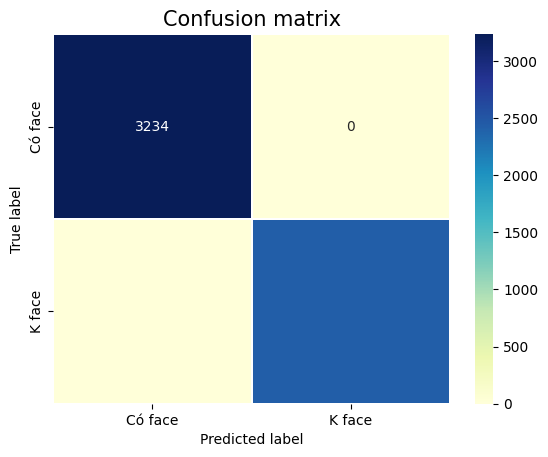

In [15]:
cm = confusion_matrix(train_labels, predictions)
print(cm)

class_names = ['Có face', 'K face']  
# Plot the confusion matrix
sns.heatmap(cm, xticklabels=class_names, yticklabels=class_names,
                annot=True, linewidths=0.1, fmt="d", cmap="YlGnBu")
plt.title("Confusion matrix", fontsize=15)
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()
